In [46]:
#!pip install node
#!pip install npm
#!pip install sodapy
from sodapy import Socrata
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import os
import datetime
import csv

import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

from config import austin_key
from config import austin_app

In [47]:
app_token= austin_app

url = "https://data.austintexas.gov/resource/fdj4-gpfu.json?"
#crime_history = pd.DataFrame()
i=1
for i in range (1, 15):
    
    app_token= austin_app
    crime= "DEL CONTROLLED SUB/NARCOTIC"


    query_url = f"{url}$$app_token={app_token}&$limit=50000&$offset={50000*i}"
    response = requests.get(query_url).json()
    if i == 1:
        crime_history=pd.DataFrame(response)
        
    else:
        
        crime_history=crime_history.append(response)
crime_history.count()

incident_report_number         700000
crime_type                     700000
ucr_code                       700000
family_violence                700000
occ_date_time                  700000
occ_date                       700000
occ_time                       700000
rep_date_time                  700000
rep_date                       700000
rep_time                       700000
location_type                  696729
address                        700000
zip_code                       694767
council_district               692861
sector                         696460
district                       696308
pra                            695471
x_coordinate                   695764
y_coordinate                   695764
latitude                       686006
longitude                      686006
location                       686006
:@computed_region_a3it_2a2z    685987
:@computed_region_8spj_utxs    683907
:@computed_region_q9nd_rr82    684724
clearance_status               629488
clearance_da

In [ ]:
moon_df = pd.read_csv("moon-phase-calendar-landscape_copy.csv")
moon_df = pd.DataFrame(moon_df)
moon_df = moon_df.drop(columns=['Unnamed: 3', 'Unnamed: 4'])
moon_df.head()
#change to date time object and rename column
moon_df['Local Date']= pd.to_datetime(moon_df['Local Date'])

moon_df.head()

In [ ]:
crime_df = pd.DataFrame(crime_history)
crime_df.head()
#if you want to group your data by time you have to do resample not .groupby(), can resample by days or by months, check time example pushed out last week
#compare if crime occurs more at night consistently vs increasing during full moon
#could sample by moon phase or day date 
#pick 10 full moon days and compare count to 10 non full moon days 

,incident_report_number,crime_type,ucr_code,family_violence,occ_date_time,occ_date,occ_time,rep_date_time,rep_date,rep_time,...,location,:@computed_region_a3it_2a2z,:@computed_region_8spj_utxs,:@computed_region_q9nd_rr82,clearance_status,clearance_date,ucr_category,category_description,:@computed_region_qwte_z96m,census_tract
0,20202411283,FAMILY DISTURBANCE,3400,N,2020-08-28T19:00:00.000,2020-08-28T00:00:00.000,1900,2020-08-28T19:47:00.000,2020-08-28T00:00:00.000,1947,...,"{'latitude': '30.15772825', 'longitude': '-97....",3637,5,1,NaN,NaN,NaN,NaN,NaN,NaN
1,20202411278,FAMILY DISTURBANCE,3400,N,2020-08-28T18:57:00.000,2020-08-28T00:00:00.000,1857,2020-08-28T18:57:00.000,2020-08-28T00:00:00.000,1857,...,"{'latitude': '30.24060511', 'longitude': '-97....",2859,3,3,NaN,NaN,NaN,NaN,NaN,NaN
2,20202411275,ASSAULT BY CONTACT FAM/DATING,902,Y,2020-08-28T18:55:00.000,2020-08-28T00:00:00.000,1855,2020-08-28T18:55:00.000,2020-08-28T00:00:00.000,1855,...,NaN,NaN,NaN,NaN,N,2020-09-02T00:00:00.000,NaN,NaN,NaN,NaN
3,20202411238,DISTURBANCE - OTHER,3401,N,2020-08-28T18:50:00.000,2020-08-28T00:00:00.000,1850,2020-08-28T18:50:00.000,2020-08-28T00:00:00.000,1850,...,NaN,NaN,NaN,NaN,N,2020-09-04T00:00:00.000,NaN,NaN,NaN,NaN
4,20205034127,BURGLARY OF VEHICLE,601,N,2020-08-28T18:47:00.000,2020-08-28T00:00:00.000,1847,2020-08-28T18:47:00.000,2020-08-28T00:00:00.000,1847,...,"{'latitude': '30.2864488', 'longitude': '-97.7...",2860,9,10,N,2020-08-30T00:00:00.000,23F,Theft,952,NaN


In [ ]:
crime_clean_df = crime_df[["crime_type", "occ_date_time", "occ_date", "occ_time", "rep_date"]].copy()
#checking if occurence is actualy date/time
#crime_clean_df.dtypes
#convert to datetime object 
#pd.to_datetime(crime_clean_df['occ_date_time'])
#put back into dataframe overwrite column
crime_clean_df['occ_date_time']= pd.to_datetime(crime_clean_df['occ_date_time'])
crime_clean_df['occ_date']= pd.to_datetime(crime_clean_df['occ_date'])

crime_clean_df.head()

,crime_type,occ_date_time,occ_date,occ_time,rep_date
0,FAMILY DISTURBANCE,2020-08-28 19:00:00,2020-08-28,1900,2020-08-28T00:00:00.000
1,FAMILY DISTURBANCE,2020-08-28 18:57:00,2020-08-28,1857,2020-08-28T00:00:00.000
2,ASSAULT BY CONTACT FAM/DATING,2020-08-28 18:55:00,2020-08-28,1855,2020-08-28T00:00:00.000
3,DISTURBANCE - OTHER,2020-08-28 18:50:00,2020-08-28,1850,2020-08-28T00:00:00.000
4,BURGLARY OF VEHICLE,2020-08-28 18:47:00,2020-08-28,1847,2020-08-28T00:00:00.000


In [ ]:
#whatever one is typed first is the left df

crime_moon_df= crime_clean_df.merge(moon_df, left_on='occ_date', right_on='Local Date', how='left')
crime_moon_df.sample(50)

,crime_type,occ_date_time,occ_date,occ_time,rep_date,Lunar Phase,Local Date,Local Time
196838,PAROLE VIOL,2018-10-11 11:30:00,2018-10-11,1130,2018-10-11T00:00:00.000,NaN,NaT,NaN
392465,BURGLARY OF VEHICLE,2016-12-06 22:00:00,2016-12-06,2200,2016-12-06T00:00:00.000,NaN,NaT,NaN
357894,PUBLIC INTOXICATION,2017-03-31 00:51:00,2017-03-31,51,2017-03-31T00:00:00.000,NaN,NaT,NaN
322859,CRUELTY TO ANIMALS,2017-07-20 12:52:00,2017-07-20,1252,2017-07-20T00:00:00.000,NaN,NaT,NaN
31610,ASSAULT W/INJURY-FAM/DATE VIOL,2020-05-05 10:38:00,2020-05-05,1038,2020-05-05T00:00:00.000,NaN,NaT,NaN
76332,BURGLARY NON RESIDENCE,2019-11-28 15:30:00,2019-11-28,1530,2019-11-29T00:00:00.000,NaN,NaT,NaN
92278,THEFT BY SHOPLIFTING,2019-10-05 19:34:00,2019-10-05,1934,2019-10-05T00:00:00.000,First Quarter,2019-10-05,11:48
693651,POSSESSION OF MARIJUANA,2014-05-04 20:47:00,2014-05-04,2047,2014-05-04T00:00:00.000,NaN,NaT,NaN
395882,POSSESSION OF MARIJUANA,2016-11-25 16:04:00,2016-11-25,1604,2016-11-25T00:00:00.000,NaN,NaT,NaN
653952,CUSTODY ARREST TRAFFIC WARR,2014-08-29 11:58:00,2014-08-29,1158,2014-08-29T00:00:00.000,NaN,NaT,NaN


In [ ]:
crime_moon_df['Lunar Phase'].value_counts()

Last Quarter     23942
First Quarter    23871
New Moon         23754
Full Moon        23222
Name: Lunar Phase, dtype: int64

In [8]:
#create pivot table of the crime duplicates and sort to find top 50 reported crimes 
duplicates = crime_clean_df.pivot_table(index = 'crime_type', aggfunc= 'size')
#data series can sort index or sort values, default to sort by index so we want to sort by the values instead
duplicates.sort_values(ascending= False).head(50)

crime_type
FAMILY DISTURBANCE                67773
BURGLARY OF VEHICLE               63740
THEFT                             62289
CRIMINAL MISCHIEF                 35115
ASSAULT W/INJURY-FAM/DATE VIOL    22461
DISTURBANCE - OTHER               21832
THEFT BY SHOPLIFTING              20994
DWI                               18987
HARASSMENT                        17185
BURGLARY OF RESIDENCE             16814
ASSAULT WITH INJURY               16310
AUTO THEFT                        15362
RUNAWAY CHILD                     12995
POSSESSION OF MARIJUANA           12791
PUBLIC INTOXICATION               12474
WARRANT ARREST NON TRAFFIC        11788
POSS CONTROLLED SUB/NARCOTIC      11784
ASSAULT BY CONTACT                11653
BURGLARY NON RESIDENCE            10776
CRIMINAL TRESPASS                  9593
FRAUD - OTHER                      9140
THEFT OF BICYCLE                   8656
IDENTITY THEFT                     7941
CUSTODY ARREST TRAFFIC WARR        7709
POSS OF DRUG PARAPHERNALIA   

In [9]:
#replace one crime type with the more generic types ex "bicycle theft" to "theft", grouping like crimes in the top 50
#df["column1"].replace({"a": "x", "b": "y"}, inplace=True)
crime_grouped = crime_moon_df.replace({"THEFT BY SHOPLIFTING" : "THEFT", "AUTO THEFT" : "THEFT", "THEFT OF BICYCLE" : "THEFT", "THEFT OF SERVICE":"THEFT", "THEFT OF LICENSE PLATE": "THEFT",
                                       "THEFT FROM AUTO":"THEFT", "THEFT FROM PERSON":"THEFT", "THEFT FROM BUILDING":"THEFT", "THEFT OF TRAILER" :"THEFT",
                                       "DWI":"INTOXICATION CRIME", "PUBLIC INTOXICATION":"INTOXICATION CRIME", "DWI 2ND": "INTOXICATION CRIME", 
                                        "DWI  .15 BAC OR ABOVE": "INTOXICATION CRIME", "DRIVING WHILE INTOX / FELONY" : "INTOXICATION CRIME",
                                       "POSSESSION OF MARIJUANA": "DRUG RELATED", "POSS CONTROLLED SUB/NARCOTIC":"DRUG RELATED", "POSS OF DRUG PARAPHERNALIA":"DRUG RELATED",
                                       "ASSAULT WITH INJURY":"ASSAULT", "ASSAULT W/INJURY-FAM/DATE VIOL" : "ASSAULT", "ASSAULT BY CONTACT" :"ASSAULT", "ASSAULT BY THREAT": "ASSAULT",
                                       "ASSAULT BY CONTACT FAM/DATING": "ASSAULT", "AGG ASSAULT":"ASSAULT", "AGG ASLT STRANGLE/SUFFOCATE":"ASSAULT",
                                       "AGG ASSAULT FAM/DATE VIOLENCE": "ASSAULT", "FELONY ENHANCEMENT/ASSLT W/INJ" : "ASSAULT", "ASSAULT  CONTACT-SEXUAL NATURE" :"ASSAULT",
                                       "AGG ROBBERY/DEADLY WEAPON": "ROBBERY", "ROBBERY BY ASSAULT" :"ROBBERY",
                                       "BURGLARY OF VEHICLE":"BURGLARY", "BURGLARY OF SHED/DETACHED GARAGE/STORAGE UNIT" : "BURGLARY", "BURGLARY OF RESIDENCE" : "BURGLARY", "BURGLARY NON RESIDENCE" :"BURGLARY",
                                       "FRAUD - OTHER" :"FRAUD", "IDENTITY THEFT":"FRAUD", "FORGERY AND PASSING":"FRAUD", "CRED CARD ABUSE - OTHER":"FRAUD", "DEBIT CARD ABUSE":"FRAUD",
                                       "FAMILY DISTURBANCE":"DISTURBANCE","DATING DISTURBANCE":"DISTURBANCE","FAMILY DISTURBANCE/PARENTAL":"DISTURBANCE","DISTURBANCE - OTHER":"DISTURBANCE"})

crime_grouped.head()

,crime_type,occ_date_time,occ_date,occ_time,rep_date,Lunar Phase,Local Date,Local Time
0,DISTURBANCE,2020-08-28 19:00:00,2020-08-28,1900,2020-08-28T00:00:00.000,NaN,NaT,NaN
1,DISTURBANCE,2020-08-28 18:57:00,2020-08-28,1857,2020-08-28T00:00:00.000,NaN,NaT,NaN
2,ASSAULT,2020-08-28 18:55:00,2020-08-28,1855,2020-08-28T00:00:00.000,NaN,NaT,NaN
3,DISTURBANCE,2020-08-28 18:50:00,2020-08-28,1850,2020-08-28T00:00:00.000,NaN,NaT,NaN
4,BURGLARY,2020-08-28 18:47:00,2020-08-28,1847,2020-08-28T00:00:00.000,NaN,NaT,NaN


In [10]:
#repeat checking duplicates to qc for typos and missed categories that can be grouped 

duplicate_groups = crime_grouped.pivot_table(index = 'crime_type', aggfunc= 'size')
duplicate_groups.sort_values(ascending= False).head(50)

#cut the small database at runaway child 

crime_type
THEFT                             124599
DISTURBANCE                       101170
BURGLARY                           93318
ASSAULT                            76263
INTOXICATION CRIME                 39901
CRIMINAL MISCHIEF                  35115
DRUG RELATED                       31911
FRAUD                              31587
HARASSMENT                         17185
RUNAWAY CHILD                      12995
WARRANT ARREST NON TRAFFIC         11788
CRIMINAL TRESPASS                   9593
CUSTODY ARREST TRAFFIC WARR         7709
CHILD CUSTODY INTERFERE             5611
ROBBERY                             5426
TERRORISTIC THREAT                  4649
SUSPICIOUS PERSON                   4470
VIOL CITY ORDINANCE - OTHER         3455
CRASH/FAIL STOP AND RENDER AID      3105
PROTECTIVE ORDER                    2468
GRAFFITI                            2403
VIOL OF PROTECTIVE ORDER            2068
FAILURE TO IDENTIFY                 1856
DAMAGE CITY PROP                    1843
RAPE 

#Plots by year

In [11]:
#use groupby occurence date to get a count of the full number of reports submitted by date 
date_df= crime_moon_df.groupby(['occ_date']).count()
date_df.reset_index(inplace=True)
#drop first row of data becuase it is incomplete due to how it was pulled from the database 
date_df = date_df.iloc[1:]
date_df.head()

,occ_date,crime_type,occ_date_time,occ_time,rep_date,Lunar Phase,Local Date,Local Time
1,2014-04-16,318,318,318,318,0,0,0
2,2014-04-17,332,332,332,332,0,0,0
3,2014-04-18,363,363,363,363,0,0,0
4,2014-04-19,308,308,308,308,0,0,0
5,2014-04-20,336,336,336,336,0,0,0


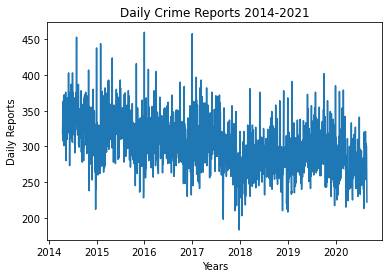

In [12]:
#line graph of date vs count for all years
plt.plot(date_df['occ_date'], date_df['crime_type'])

plt.title("Daily Crime Reports 2014-2021")
plt.xlabel("Years")
plt.ylabel("Daily Reports")
plt.show()

There is a lot of noise on the data set and we want to see the x axis in months
Going to break up the data by year in order to visualize it on a more appropriate time scale 

In [13]:
#make a data frame for every year using .loc
fourteen_df = date_df.loc[(date_df['occ_date'] >= "2014-04-15") & (date_df['occ_date'] <= "2014-12-31")]
#use .loc to select only full moons in order to make the full moon pics on the plot
fourteen_full_moon = moon_df.loc[(moon_df['Lunar Phase'] == 'Full Moon') & (moon_df['Local Date'] >= "2014-04-15") & (moon_df['Local Date'] <= "2014-12-31")]
fourteen_full_moon

,Lunar Phase,Local Date,Local Time
14,Full Moon,2014-04-15,2:45
18,Full Moon,2014-05-14,14:18
22,Full Moon,2014-06-12,23:13
26,Full Moon,2014-07-12,6:26
30,Full Moon,2014-08-10,13:10
34,Full Moon,2014-09-08,20:38
38,Full Moon,2014-10-08,5:50
42,Full Moon,2014-11-06,16:22
46,Full Moon,2014-12-06,6:27


In [14]:
#use list comprehendion to create coordinates for the vertical line
#need to use a for loop in order to pull all of the full moon dates for the year 
#x value will be the date and y value will be successive points along the range of the y axis 
#specify color 

plt.figure(figsize= (10,5))
plt.plot(fourteen_df['occ_date'], fourteen_df['crime_type'])
#line where x value stays the same and y value changes 
#x for x in range 200 to 450
for i, row in fourteen_full_moon.iterrows():
    x= [row['Local Date'] for x in range (200, 450)]
    y= [x for x in range (200, 450)]
    
    plt.plot(x, y, color="red")

plt.title("Correlation of Full Moons and Crime Reports per Day- 2014")
plt.xlabel("Months")
plt.ylabel("Reports per Day")
plt.legend(labels = ['Report Count', 'Full Moon'])
plt.show()

In [15]:
#repeat for 2015
fifteen_df = date_df.loc[(date_df['occ_date'] >= "2015-01-01") & (date_df['occ_date'] <= "2015-12-31")]

fifteen_full_moon = moon_df.loc[(moon_df['Lunar Phase'] == 'Full Moon') & (moon_df['Local Date'] >= "2015-01-01") & (moon_df['Local Date'] <= "2015-12-31")]

plt.figure(figsize= (10,5))
plt.plot(fifteen_df['occ_date'], fifteen_df['crime_type'])
#line where x value stays the same and y value changes 
#x for x in range 200 to 450
for i, row in fifteen_full_moon.iterrows():
    x= [row['Local Date'] for x in range (200, 450)]
    y= [x for x in range (200, 450)]
    
    plt.plot(x, y, color="red")

plt.title("Correlation of Full Moons and Crime Reports per Day- 2015")
plt.xlabel("Months")
plt.ylabel("Reports per Day")
plt.legend(labels = ['Report Count', 'Full Moon'])
plt.show()

In [16]:
#repeat for 2016
sixteen_df = date_df.loc[(date_df['occ_date'] >= "2016-01-01") & (date_df['occ_date'] <= "2016-12-31")]
sixteen_full_moon = moon_df.loc[(moon_df['Lunar Phase'] == 'Full Moon') & (moon_df['Local Date'] >= "2016-01-01") & (moon_df['Local Date'] <= "2016-12-31")]

plt.figure(figsize= (10,5))
plt.plot(sixteen_df['occ_date'], sixteen_df['crime_type'])
#line where x value stays the same and y value changes 
#x for x in range 200 to 450
for i, row in sixteen_full_moon.iterrows():
    x= [row['Local Date'] for x in range (200, 450)]
    y= [x for x in range (200, 450)]
    
    plt.plot(x, y, color="red")

plt.title("Correlation of Full Moons and Crime Reports per Day- 2016")
plt.xlabel("Months")
plt.ylabel("Reports per Day")
plt.legend(labels = ['Report Count', 'Full Moon'])
plt.show()

In [17]:
#repeat for 2017
seventeen_df = date_df.loc[(date_df['occ_date'] >= "2017-01-01") & (date_df['occ_date'] <= "2017-12-31")]

seventeen_full_moon = moon_df.loc[(moon_df['Lunar Phase'] == 'Full Moon') & (moon_df['Local Date'] >= "2017-01-01") & (moon_df['Local Date'] <= "2017-12-31")]

plt.figure(figsize= (10,5))
plt.plot(seventeen_df['occ_date'], seventeen_df['crime_type'])
#line where x value stays the same and y value changes 
#x for x in range 200 to 450
for i, row in seventeen_full_moon.iterrows():
    x= [row['Local Date'] for x in range (200, 450)]
    y= [x for x in range (200, 450)]
    
    plt.plot(x, y, color="red")

plt.title("Correlation of Full Moons and Crime Reports per Day- 2017")
plt.xlabel("Months")
plt.ylabel("Reports per Day")
plt.legend(labels = ['Report Count', 'Full Moon'])
plt.show()

In [18]:
#repeat for 2018
eighteen_df = date_df.loc[(date_df['occ_date'] >= "2018-01-01") & (date_df['occ_date'] <= "2018-12-31")]

eighteen_full_moon = moon_df.loc[(moon_df['Lunar Phase'] == 'Full Moon') & (moon_df['Local Date'] >= "2018-01-01") & (moon_df['Local Date'] <= "2018-12-31")]

plt.figure(figsize= (10,5))
plt.plot(eighteen_df['occ_date'], eighteen_df['crime_type'])
#line where x value stays the same and y value changes 
#x for x in range 200 to 450
for i, row in eighteen_full_moon.iterrows():
    x= [row['Local Date'] for x in range (200, 450)]
    y= [x for x in range (200, 450)]
    
    plt.plot(x, y, color="red")

plt.title("Correlation of Full Moons and Crime Reports per Day- 2018")
plt.xlabel("Months")
plt.ylabel("Reports per Day")
plt.legend(labels = ['Report Count', 'Full Moon'])
plt.show()

In [19]:
#repeat for 2019
nineteen_df = date_df.loc[(date_df['occ_date'] >= "2019-01-01") & (date_df['occ_date'] <= "2019-12-31")]

nineteen_full_moon = moon_df.loc[(moon_df['Lunar Phase'] == 'Full Moon') & (moon_df['Local Date'] >= "2019-01-01") & (moon_df['Local Date'] <= "2019-12-31")]

plt.figure(figsize= (10,5))
plt.plot(nineteen_df['occ_date'], nineteen_df['crime_type'])
#line where x value stays the same and y value changes 
#x for x in range 200 to 450
for i, row in nineteen_full_moon.iterrows():
    x= [row['Local Date'] for x in range (200, 450)]
    y= [x for x in range (200, 450)]
    
    plt.plot(x, y, color="red")

plt.title("Correlation of Full Moons and Crime Reports per Day- 2019")
plt.xlabel("Months")
plt.ylabel("Reports per Day")
plt.legend(labels = ['Report Count', 'Full Moon'])
plt.show()

In [20]:
#repeat for 2020
twenty_df = date_df.loc[(date_df['occ_date'] >= "2020-01-01") & (date_df['occ_date'] <= "2020-12-31")]

twenty_full_moon = moon_df.loc[(moon_df['Lunar Phase'] == 'Full Moon') & (moon_df['Local Date'] >= "2020-01-01") & (moon_df['Local Date'] <= "2020-12-31")]

plt.figure(figsize= (10,5))
plt.plot(twenty_df['occ_date'], twenty_df['crime_type'])
#line where x value stays the same and y value changes 
#x for x in range 200 to 450
for i, row in twenty_full_moon.iterrows():
    x= [row['Local Date'] for x in range (200, 450)]
    y= [x for x in range (200, 450)]
    
    plt.plot(x, y, color="red")

plt.title("Correlation of Full Moons and Crime Reports per Day- 2020")
plt.xlabel("Months")
plt.ylabel("Reports per Day")
plt.legend(labels = ['Report Count', 'Full Moon'])
plt.show()

In [21]:
#create a df with only full moon phases across the full 7 year period (can be used for box and whisker plots) 
full_moon_list = ['Full Moon']

full_moon_df = crime_grouped.loc[crime_grouped['Lunar Phase'].isin(full_moon_list)]

full_moon_df.sample(10)

,crime_type,occ_date_time,occ_date,occ_time,rep_date,Lunar Phase,Local Date,Local Time
22949,BURGLARY,2020-06-05 01:05:00,2020-06-05,105,2020-06-05T00:00:00.000,Full Moon,2020-06-05,14:12
193164,CRIMINAL MISCHIEF,2018-10-24 00:41:00,2018-10-24,41,2018-10-24T00:00:00.000,Full Moon,2018-10-24,11:47
64128,CRIMINAL MISCHIEF,2020-01-10 09:10:00,2020-01-10,910,2020-01-10T00:00:00.000,Full Moon,2020-01-10,13:23
670266,THEFT,2014-07-12 14:00:00,2014-07-12,1400,2014-07-12T00:00:00.000,Full Moon,2014-07-12,6:26
526923,DISTURBANCE,2015-09-27 00:03:00,2015-09-27,3,2015-09-27T00:00:00.000,Full Moon,2015-09-27,21:52
64105,FRAUD,2020-01-10 11:53:00,2020-01-10,1153,2020-01-29T00:00:00.000,Full Moon,2020-01-10,13:23
107910,BURGLARY,2019-08-15 06:30:00,2019-08-15,630,2019-08-15T00:00:00.000,Full Moon,2019-08-15,7:31
462593,CRIMINAL MISCHIEF,2016-04-22 14:00:00,2016-04-22,1400,2016-04-24T00:00:00.000,Full Moon,2016-04-22,0:25
283584,THEFT,2017-12-03 12:12:00,2017-12-03,1212,2017-12-18T00:00:00.000,Full Moon,2017-12-03,9:48
670149,BURGLARY,2014-07-12 21:30:00,2014-07-12,2130,2014-07-13T00:00:00.000,Full Moon,2014-07-12,6:26


In [22]:
#create df with only new moon phases across full 7 year period (can be used for box and whisker plots)
new_moon_list = ['New Moon']

new_moon_df = crime_grouped.loc[crime_grouped['Lunar Phase'].isin(new_moon_list)]

new_moon_df.sample(10)

,crime_type,occ_date_time,occ_date,occ_time,rep_date,Lunar Phase,Local Date,Local Time
42602,BURGLARY,2020-03-24 12:00:00,2020-03-24,1200,2020-03-25T00:00:00.000,New Moon,2020-03-24,4:29
626054,CRIMINAL MISCHIEF,2014-11-22 11:04:00,2014-11-22,1104,2014-11-22T00:00:00.000,New Moon,2014-11-22,6:32
180661,BURGLARY,2018-12-07 02:00:00,2018-12-07,200,2018-12-07T00:00:00.000,New Moon,2018-12-07,1:21
279657,THEFT,2017-12-18 08:00:00,2017-12-18,800,2017-12-18T00:00:00.000,New Moon,2017-12-18,0:31
304555,ASSAULT,2017-09-20 15:04:00,2017-09-20,1504,2017-09-20T00:00:00.000,New Moon,2017-09-20,0:30
189133,ASSAULT,2018-11-07 00:00:00,2018-11-07,0,2018-11-07T00:00:00.000,New Moon,2018-11-07,10:02
214105,BURGLARY,2018-08-11 21:00:00,2018-08-11,2100,2018-08-11T00:00:00.000,New Moon,2018-08-11,4:59
60156,ASSAULT,2020-01-24 17:00:00,2020-01-24,1700,2020-01-24T00:00:00.000,New Moon,2020-01-24,15:44
503909,THEFT,2015-12-11 19:15:00,2015-12-11,1915,2015-12-11T00:00:00.000,New Moon,2015-12-11,4:29
589466,THEFT,2015-03-20 14:57:00,2015-03-20,1457,2015-05-05T00:00:00.000,New Moon,2015-03-20,4:38


In [23]:
#create a list of the top 10 most reported crimes                
crime_list = ['THEFT', 'DISTURBANCE', 'BURGLARY', 'ASSAULT', 'INTOXICATION CRIME', 'CRIMINAL MISCHIEF', 'DRUG RELATED', 'FRAUD', 'HARASSMENT', 'RUNAWAY CHILD']

top_crime_df = crime_grouped.loc[crime_grouped['crime_type'].isin(crime_list)]

top_crime_df.sample(10)

,crime_type,occ_date_time,occ_date,occ_time,rep_date,Lunar Phase,Local Date,Local Time
98401,DISTURBANCE,2019-09-16 01:18:00,2019-09-16,118,2019-09-16T00:00:00.000,NaN,NaT,NaN
26103,ASSAULT,2020-05-24 22:00:00,2020-05-24,2200,2020-05-25T00:00:00.000,NaN,NaT,NaN
355031,INTOXICATION CRIME,2017-04-09 03:07:00,2017-04-09,307,2017-04-09T00:00:00.000,NaN,NaT,NaN
359423,ASSAULT,2017-03-25 21:19:00,2017-03-25,2119,2017-03-25T00:00:00.000,NaN,NaT,NaN
388052,DRUG RELATED,2016-12-21 20:27:00,2016-12-21,2027,2016-12-21T00:00:00.000,NaN,NaT,NaN
29582,THEFT,2020-05-12 19:50:00,2020-05-12,1950,2020-05-13T00:00:00.000,NaN,NaT,NaN
488746,THEFT,2016-01-30 04:46:00,2016-01-30,446,2016-01-30T00:00:00.000,NaN,NaT,NaN
67676,BURGLARY,2019-12-29 00:01:00,2019-12-29,1,2019-12-29T00:00:00.000,NaN,NaT,NaN
260138,DRUG RELATED,2018-03-02 13:42:00,2018-03-02,1342,2018-03-02T00:00:00.000,NaN,NaT,NaN
96205,THEFT,2019-09-23 07:00:00,2019-09-23,700,2019-09-23T00:00:00.000,NaN,NaT,NaN


In [24]:

intox_list = ['INTOXICATION CRIME']

intox_crime_df = crime_grouped.loc[crime_grouped['crime_type'].isin(intox_list)]

intox_crime_df.sample(10)

,crime_type,occ_date_time,occ_date,occ_time,rep_date,Lunar Phase,Local Date,Local Time
66796,INTOXICATION CRIME,2020-01-01 00:56:00,2020-01-01,56,2020-01-01T00:00:00.000,NaN,NaT,NaN
564312,INTOXICATION CRIME,2015-06-05 00:29:00,2015-06-05,29,2015-06-05T00:00:00.000,NaN,NaT,NaN
549987,INTOXICATION CRIME,2015-07-17 23:02:00,2015-07-17,2302,2015-07-17T00:00:00.000,NaN,NaT,NaN
591264,INTOXICATION CRIME,2015-03-15 02:54:00,2015-03-15,254,2015-03-15T00:00:00.000,NaN,NaT,NaN
531355,INTOXICATION CRIME,2015-09-13 03:03:00,2015-09-13,303,2015-09-13T00:00:00.000,New Moon,2015-09-13,1:42
295448,INTOXICATION CRIME,2017-10-21 20:18:00,2017-10-21,2018,2017-10-21T00:00:00.000,NaN,NaT,NaN
698955,INTOXICATION CRIME,2014-04-19 00:42:00,2014-04-19,42,2014-04-19T00:00:00.000,NaN,NaT,NaN
382731,INTOXICATION CRIME,2017-01-09 02:49:00,2017-01-09,249,2017-01-09T00:00:00.000,NaN,NaT,NaN
638763,INTOXICATION CRIME,2014-10-13 23:24:00,2014-10-13,2324,2014-10-13T00:00:00.000,NaN,NaT,NaN
658752,INTOXICATION CRIME,2014-08-15 01:54:00,2014-08-15,154,2014-08-15T00:00:00.000,NaN,NaT,NaN


In [25]:
assault_list = ['ASSAULT']

assault_df = crime_grouped.loc[crime_grouped['crime_type'].isin(assault_list)]

assault_df.sample(10)

,crime_type,occ_date_time,occ_date,occ_time,rep_date,Lunar Phase,Local Date,Local Time
107410,ASSAULT,2019-08-16 20:00:00,2019-08-16,2000,2019-08-17T00:00:00.000,NaN,NaT,NaN
361382,ASSAULT,2017-03-19 19:02:00,2017-03-19,1902,2017-03-19T00:00:00.000,NaN,NaT,NaN
561274,ASSAULT,2015-06-13 21:11:00,2015-06-13,2111,2015-06-13T00:00:00.000,NaN,NaT,NaN
114620,ASSAULT,2019-07-24 02:53:00,2019-07-24,253,2019-07-24T00:00:00.000,Last Quarter,2019-07-24,20:20
412721,ASSAULT,2016-09-30 12:27:00,2016-09-30,1227,2016-09-30T00:00:00.000,New Moon,2016-09-30,19:13
110652,ASSAULT,2019-08-05 21:15:00,2019-08-05,2115,2019-08-05T00:00:00.000,NaN,NaT,NaN
312121,ASSAULT,2017-08-25 06:40:00,2017-08-25,640,2017-08-25T00:00:00.000,NaN,NaT,NaN
128903,ASSAULT,2019-06-06 00:06:00,2019-06-06,6,2019-06-06T00:00:00.000,NaN,NaT,NaN
151341,ASSAULT,2019-03-21 19:59:00,2019-03-21,1959,2019-03-21T00:00:00.000,NaN,NaT,NaN
451624,ASSAULT,2016-05-27 14:40:00,2016-05-27,1440,2016-05-27T00:00:00.000,NaN,NaT,NaN


In [26]:
steal_list = ['THEFT', 'BURGLARY']

steal_df = crime_grouped.loc[crime_grouped['crime_type'].isin(steal_list)]

steal_df.sample(10)

,crime_type,occ_date_time,occ_date,occ_time,rep_date,Lunar Phase,Local Date,Local Time
459189,THEFT,2016-05-02 20:31:00,2016-05-02,2031,2016-05-02T00:00:00.000,NaN,NaT,NaN
144903,THEFT,2019-04-13 10:26:00,2019-04-13,1026,2019-04-13T00:00:00.000,NaN,NaT,NaN
524889,THEFT,2015-10-03 12:59:00,2015-10-03,1259,2015-10-08T00:00:00.000,NaN,NaT,NaN
455205,THEFT,2016-05-15 17:42:00,2016-05-15,1742,2016-05-15T00:00:00.000,NaN,NaT,NaN
83992,BURGLARY,2019-11-02 15:56:00,2019-11-02,1556,2019-11-02T00:00:00.000,NaN,NaT,NaN
432344,THEFT,2016-07-28 17:22:00,2016-07-28,1722,2016-07-29T00:00:00.000,NaN,NaT,NaN
99958,THEFT,2019-09-10 15:00:00,2019-09-10,1500,2019-09-11T00:00:00.000,NaN,NaT,NaN
93592,THEFT,2019-10-01 21:03:00,2019-10-01,2103,2019-10-01T00:00:00.000,NaN,NaT,NaN
163196,THEFT,2019-02-08 15:03:00,2019-02-08,1503,2019-02-08T00:00:00.000,NaN,NaT,NaN
574324,BURGLARY,2015-05-05 09:38:00,2015-05-05,938,2015-05-05T00:00:00.000,NaN,NaT,NaN


In [27]:
drug_list = ['DRUG RELATED']

drug_df = crime_grouped.loc[crime_grouped['crime_type'].isin(drug_list)]

drug_df.sample(10)

,crime_type,occ_date_time,occ_date,occ_time,rep_date,Lunar Phase,Local Date,Local Time
354166,DRUG RELATED,2017-04-12 04:07:00,2017-04-12,407,2017-04-12T00:00:00.000,NaN,NaT,NaN
512526,DRUG RELATED,2015-11-12 14:46:00,2015-11-12,1446,2015-11-12T00:00:00.000,NaN,NaT,NaN
318853,DRUG RELATED,2017-08-01 23:00:00,2017-08-01,2300,2017-08-01T00:00:00.000,NaN,NaT,NaN
559464,DRUG RELATED,2015-06-19 16:40:00,2015-06-19,1640,2015-06-19T00:00:00.000,NaN,NaT,NaN
250714,DRUG RELATED,2018-04-04 23:26:00,2018-04-04,2326,2018-04-04T00:00:00.000,NaN,NaT,NaN
490057,DRUG RELATED,2016-01-26 00:26:00,2016-01-26,26,2016-01-26T00:00:00.000,NaN,NaT,NaN
472550,DRUG RELATED,2016-03-21 15:14:00,2016-03-21,1514,2016-03-21T00:00:00.000,NaN,NaT,NaN
413138,DRUG RELATED,2016-09-28 23:48:00,2016-09-28,2348,2016-09-28T00:00:00.000,NaN,NaT,NaN
366564,DRUG RELATED,2017-03-03 03:51:00,2017-03-03,351,2017-03-03T00:00:00.000,NaN,NaT,NaN
402126,DRUG RELATED,2016-11-03 23:39:00,2016-11-03,2339,2016-11-03T00:00:00.000,NaN,NaT,NaN


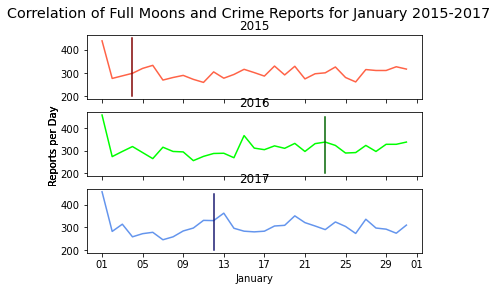

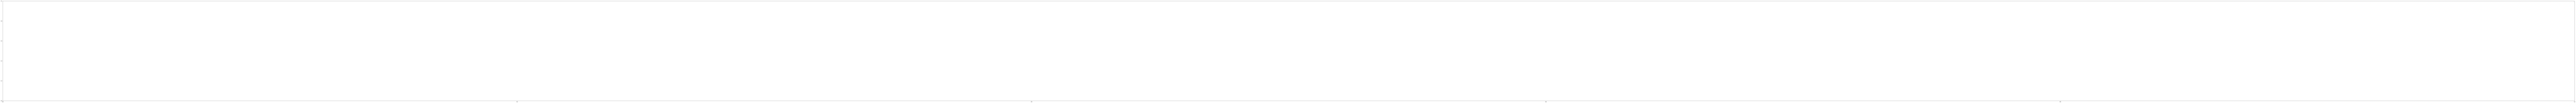

In [28]:
##line graph of 3-5 months with all moon phase lines plotted on top (Fatima)
#Pick 3 months (Jan, Jul, Oct, Dec)* These years were selected to see if there was a correlation 
#  with New years, 4th of July, Halloween, Christmas and crime vs the full moon days on the same chart
#Pick 3 years (2015,2016,2017)
#Full moon color per year 2015-Red 2016-Green 2017-Blue


###JANUARY###

#Creating 3 subplots
fig, axs = plt.subplots(3)

Jan15_df = date_df.loc[(date_df['occ_date'] >= "2015-01-01") & (date_df['occ_date'] <= "2015-01-31")]
Jan15_full_moon = moon_df.loc[(moon_df['Lunar Phase'] == 'Full Moon') & (moon_df['Local Date'] >= "2015-01-01") & (moon_df['Local Date'] <= "2015-01-31")]
plt.figure(figsize= (500,20))
axs[0].plot(Jan15_df['occ_date'], Jan15_df['crime_type'], color="tomato")


Jan16_df = date_df.loc[(date_df['occ_date'] >= "2016-01-01") & (date_df['occ_date'] <= "2016-01-31")]
Jan16_full_moon = moon_df.loc[(moon_df['Lunar Phase'] == 'Full Moon') & (moon_df['Local Date'] >= "2016-01-01") & (moon_df['Local Date'] <= "2016-01-31")]
axs[1].plot(Jan16_df['occ_date'], Jan16_df['crime_type'], color="lime")


Jan17_df = date_df.loc[(date_df['occ_date'] >= "2017-01-01") & (date_df['occ_date'] <= "2017-01-31")]
Jan17_full_moon = moon_df.loc[(moon_df['Lunar Phase'] == 'Full Moon') & (moon_df['Local Date'] >= "2017-01-01") & (moon_df['Local Date'] <= "2017-01-31")]
axs[2].plot(Jan17_df['occ_date'], Jan17_df['crime_type'], color="cornflowerblue")

# PLoting the full moon days
#line where x value stays the same and y value changes 
#x for x in range 200 to 450
for i, row in Jan15_full_moon.iterrows():
    x1= [row['Local Date'] for x in range (200, 450)]

for i, row in Jan16_full_moon.iterrows():
    x2= [row['Local Date'] for x in range (200, 450)]    

for i, row in Jan17_full_moon.iterrows():
    x3= [row['Local Date'] for x in range (200, 450)]  
 #  Common y for all years 
    y= [x for x in range (200, 450)]

    #Setting colors of the lines
    axs[0].plot(x1, y, color="maroon")
    axs[1].plot(x2, y, color="darkgreen")
    axs[2].plot(x3, y, color="midnightblue")

#Setting the global title
st = fig.suptitle("Correlation of Full Moons and Crime Reports for January 2015-2017", fontsize="x-large")
 
    #Setting x axis tile and y axis title
for ax in axs.flat:
    ax.set(xlabel='January')
    fig.text(0.05,0.5, "Reports per Day", ha="center", va="center", rotation=90)


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    

axs[0].set_title('2015')
axs[1].set_title('2016')
axs[2].set_title('2017')

# Defineing the format for x axis ticks 
date_form = DateFormatter("%d")
ax.xaxis.set_major_formatter(date_form)


#Labeling each graph with year name 
plt.legend(labels = ['2015', '2016' , '2017'])
plt.show()

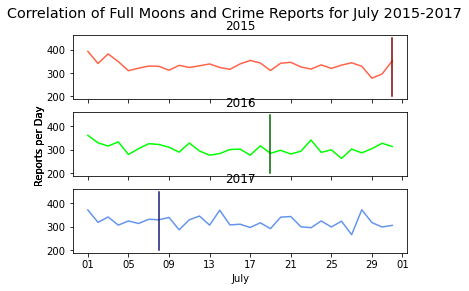

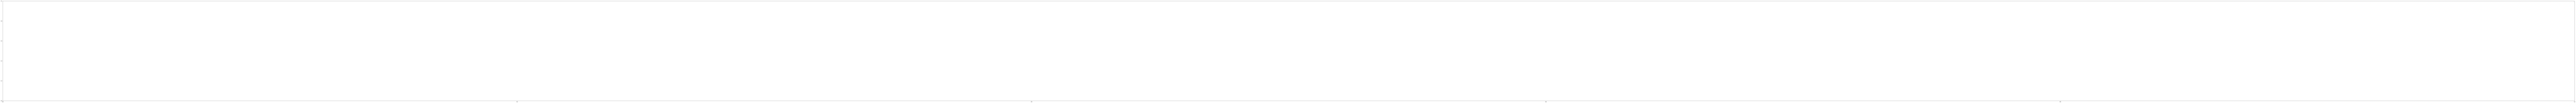

In [29]:
###JULY###

#Creating 3 subplots
fig, axs = plt.subplots(3)

Jul15_df = date_df.loc[(date_df['occ_date'] >= "2015-07-01") & (date_df['occ_date'] <= "2015-07-31")]
Jul15_full_moon = moon_df.loc[(moon_df['Lunar Phase'] == 'Full Moon') & (moon_df['Local Date'] >= "2015-07-01") & (moon_df['Local Date'] <= "2015-07-31")]
plt.figure(figsize= (500,20))
axs[0].plot(Jul15_df['occ_date'], Jul15_df['crime_type'], color="tomato")


Jul16_df = date_df.loc[(date_df['occ_date'] >= "2016-07-01") & (date_df['occ_date'] <= "2016-07-31")]
Jul16_full_moon = moon_df.loc[(moon_df['Lunar Phase'] == 'Full Moon') & (moon_df['Local Date'] >= "2016-07-01") & (moon_df['Local Date'] <= "2016-07-31")]
axs[1].plot(Jul16_df['occ_date'], Jul16_df['crime_type'], color="lime")


Jul17_df = date_df.loc[(date_df['occ_date'] >= "2017-07-01") & (date_df['occ_date'] <= "2017-07-31")]
Jul17_full_moon = moon_df.loc[(moon_df['Lunar Phase'] == 'Full Moon') & (moon_df['Local Date'] >= "2017-07-01") & (moon_df['Local Date'] <= "2017-07-31")]
axs[2].plot(Jul17_df['occ_date'], Jul17_df['crime_type'], color="cornflowerblue")

# PLoting the full moon days
#line where x value stays the same and y value changes 
#x for x in range 200 to 450
for i, row in Jul15_full_moon.iterrows():
    x1= [row['Local Date'] for x in range (200, 450)]

for i, row in Jul16_full_moon.iterrows():
    x2= [row['Local Date'] for x in range (200, 450)]    

for i, row in Jul17_full_moon.iterrows():
    x3= [row['Local Date'] for x in range (200, 450)]  
 #  Common y for all years 
    y= [x for x in range (200, 450)]

    #Setting colors of the lines
    axs[0].plot(x1, y, color="maroon")
    axs[1].plot(x2, y, color="darkgreen")
    axs[2].plot(x3, y, color="midnightblue")

#Setting the global title
st = fig.suptitle("Correlation of Full Moons and Crime Reports for July 2015-2017", fontsize="x-large")
 
    #Setting x axis tile and y axis title
for ax in axs.flat:
    ax.set(xlabel='July')
    fig.text(0.05,0.5, "Reports per Day", ha="center", va="center", rotation=90)


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    

axs[0].set_title('2015')
axs[1].set_title('2016')
axs[2].set_title('2017')

# Defineing the format for x axis ticks 
date_form = DateFormatter("%d")
ax.xaxis.set_major_formatter(date_form)


#Labeling each graph with year name 
plt.legend(labels = ['2015', '2016' , '2017'])
plt.show()

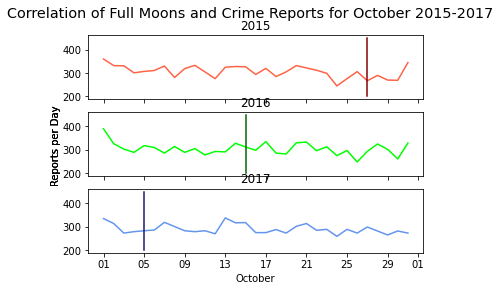

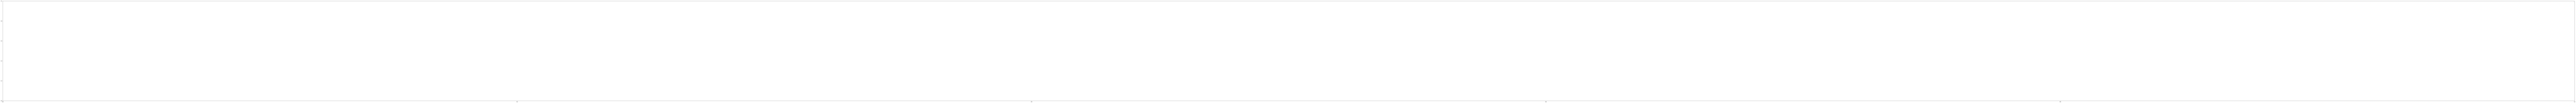

In [31]:
###OCTOBER###

#Creating 3 subplots
fig, axs = plt.subplots(3)

Oct15_df = date_df.loc[(date_df['occ_date'] >= "2015-10-01") & (date_df['occ_date'] <= "2015-10-31")]
Oct15_full_moon = moon_df.loc[(moon_df['Lunar Phase'] == 'Full Moon') & (moon_df['Local Date'] >= "2015-10-01") & (moon_df['Local Date'] <= "2015-10-31")]
plt.figure(figsize= (500,20))
axs[0].plot(Oct15_df['occ_date'], Oct15_df['crime_type'], color="tomato")

Oct16_df = date_df.loc[(date_df['occ_date'] >= "2016-10-01") & (date_df['occ_date'] <= "2016-10-31")]
Oct16_full_moon = moon_df.loc[(moon_df['Lunar Phase'] == 'Full Moon') & (moon_df['Local Date'] >= "2016-10-01") & (moon_df['Local Date'] <= "2016-10-31")]
axs[1].plot(Oct16_df['occ_date'], Oct16_df['crime_type'], color="lime")


Oct17_df = date_df.loc[(date_df['occ_date'] >= "2017-10-01") & (date_df['occ_date'] <= "2017-10-31")]
Oct17_full_moon = moon_df.loc[(moon_df['Lunar Phase'] == 'Full Moon') & (moon_df['Local Date'] >= "2017-10-01") & (moon_df['Local Date'] <= "2017-10-31")]
axs[2].plot(Oct17_df['occ_date'], Oct17_df['crime_type'], color="cornflowerblue")

# PLoting the full moon days
#line where x value stays the same and y value changes 
#x for x in range 200 to 450
for i, row in Oct15_full_moon.iterrows():
    x1= [row['Local Date'] for x in range (200, 450)]

for i, row in Oct16_full_moon.iterrows():
    x2= [row['Local Date'] for x in range (200, 450)]    

for i, row in Oct17_full_moon.iterrows():
    x3= [row['Local Date'] for x in range (200, 450)]  
 #  Common y for all years 
    y= [x for x in range (200, 450)]

    #Setting colors of the lines
    axs[0].plot(x1, y, color="maroon")
    axs[1].plot(x2, y, color="darkgreen")
    axs[2].plot(x3, y, color="midnightblue")

#Setting the global title
st = fig.suptitle("Correlation of Full Moons and Crime Reports for October 2015-2017", fontsize="x-large")
 
    #Setting x axis tile and y axis title
for ax in axs.flat:
    ax.set(xlabel='October')
    fig.text(0.05,0.5, "Reports per Day", ha="center", va="center", rotation=90)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    

axs[0].set_title('2015')
axs[1].set_title('2016')
axs[2].set_title('2017')

# Defineing the format for x axis ticks 
date_form = DateFormatter("%d")
ax.xaxis.set_major_formatter(date_form)

#Labeling each graph with year name 
plt.legend(labels = ['2015', '2016' , '2017'])
plt.show()

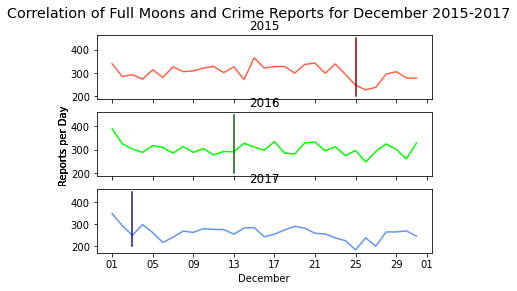

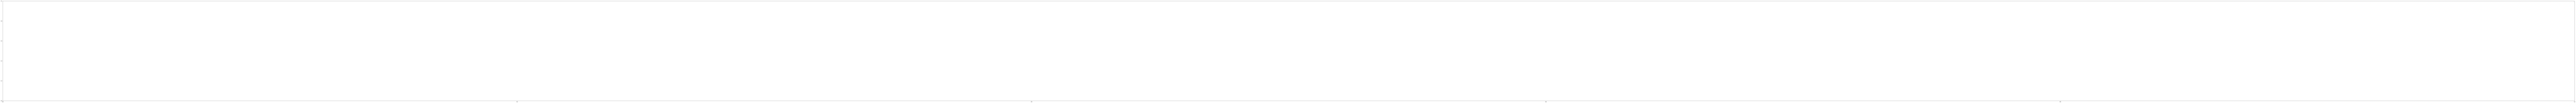

In [32]:
###DECEMBER###

#Creating 3 subplots
fig, axs = plt.subplots(3)

Dec15_df = date_df.loc[(date_df['occ_date'] >= "2015-12-01") & (date_df['occ_date'] <= "2015-12-31")]
Dec15_full_moon = moon_df.loc[(moon_df['Lunar Phase'] == 'Full Moon') & (moon_df['Local Date'] >= "2015-12-01") & (moon_df['Local Date'] <= "2015-12-31")]
plt.figure(figsize= (500,20))
axs[0].plot(Dec15_df['occ_date'], Dec15_df['crime_type'], color="tomato")


Dec16_df = date_df.loc[(date_df['occ_date'] >= "2016-12-01") & (date_df['occ_date'] <= "2016-12-31")]
Dec16_full_moon = moon_df.loc[(moon_df['Lunar Phase'] == 'Full Moon') & (moon_df['Local Date'] >= "2016-12-01") & (moon_df['Local Date'] <= "2016-12-31")]
axs[1].plot(Dec16_df['occ_date'], Oct16_df['crime_type'], color="lime")


Dec17_df = date_df.loc[(date_df['occ_date'] >= "2017-12-01") & (date_df['occ_date'] <= "2017-12-31")]
Dec17_full_moon = moon_df.loc[(moon_df['Lunar Phase'] == 'Full Moon') & (moon_df['Local Date'] >= "2017-12-01") & (moon_df['Local Date'] <= "2017-12-31")]
axs[2].plot(Dec17_df['occ_date'], Dec17_df['crime_type'], color="cornflowerblue")

# PLoting the full moon days
#line where x value stays the same and y value changes 
#x for x in range 200 to 450
for i, row in Dec15_full_moon.iterrows():
    x1= [row['Local Date'] for x in range (200, 450)]

for i, row in Dec16_full_moon.iterrows():
    x2= [row['Local Date'] for x in range (200, 450)]    

for i, row in Dec17_full_moon.iterrows():
    x3= [row['Local Date'] for x in range (200, 450)]  
 #  Common y for all years 
    y= [x for x in range (200, 450)]

    #Setting colors of the lines
    axs[0].plot(x1, y, color="maroon")
    axs[1].plot(x2, y, color="darkgreen")
    axs[2].plot(x3, y, color="midnightblue")

#Setting the global title
st = fig.suptitle("Correlation of Full Moons and Crime Reports for December 2015-2017", fontsize="x-large")
 
    #Setting x axis tile and y axis title
for ax in axs.flat:
    ax.set(xlabel='December')
    fig.text(0.05,0.5, "Reports per Day", ha="center", va="center", rotation=90)


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    

axs[0].set_title('2015')
axs[1].set_title('2016')
axs[2].set_title('2017')

# Defineing the format for x axis ticks 
date_form = DateFormatter("%d")
ax.xaxis.set_major_formatter(date_form)


#Labeling each graph with year name 
plt.legend(labels = ['2015', '2016' , '2017'])
plt.show()

-COMPLETED annual daily report numbers with full moon lines plotted on top
    -2014
    -2015
    -2016
    -2017
    -2018
    -2019
    -2020
    -2021 (erin)
    
-COMPLETED plot report numbers over all reporting years

-box and whisker plots for all years of data, separate boxes for separate moon phases to see if there is a trend (jon)

-line graph of 3-5 months with all moon phase lines plotted on top (Fatima)

-measure of central tendency for all full moons in datasets (report counts) (greg)

-split out violent vs nonviolent crimes for line graphs over 1-2 years and box and whisker plots 

-compare curves of only top 10 crimes with all crimes 
